# <center>Acceptance, Affordability and Willingness to take COVID 19 Vaccine
#### Angel Mary Abraham (2048027)
#### Namitha Antony (2048044)

# Importing required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import tree
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from collections import Counter

# Loading Dataset

In [2]:
#load the dataset using read_csv function
data = pd.read_csv('E:\\CHRIST\\MDS\\M\\ML\\FormResponses.csv')
data.head()

,Timestamp,Name,Age,Gender,State/UT,Where do you live?,Educational qualification?,What is your Employment?,Marital Status?,Does health centers near you currently have the ability to test patients for COVID-19?,Which Indian vaccine is availed by your state or UT?,"On an average for each week, how quickly are health centers near you, able to obtain COVID-19 test results for SARS-CoV-2 virus detection (PCR, antigen)?",How many people from your locality have tested positive for COVID-19 in the last week?,Which of the followings define your concerns about getting the vaccine?,What challenges does your locality face in deploying the COVID-19 vaccine?,Which of the following would be helpful if you did not decide yet about taking the vaccine?,Your affordable cost of vaccine?,Are you planning to get the COVID-19 vaccine?,"If Yes, then You want vaccine of?","Please provide any additional information, comments, or challenges you are experiencing due to supply or intake of COVID-19 vaccine."
0,04-07-21 13:55,Angel Mary Abraham,18-25Y,Female,Karnataka (KA),Urban,Post-Graduation,Student,Single,Yes,Covishield,12 hours or less,20-50,I have concerns about the vaccines side effect...,Financial reimbursement for costs associated w...,If my doctor would approve,below Rs 500,Yes,Indian Vaccine,NaN
1,04-07-21 13:59,Namitha,18-25Y,Female,Kerala (KL),Semi-Urban,Graduation,Student,Single,Yes,Not aware,24 hrs,0-20,I have concerns about the vaccines side effect...,Vaccine supply,I want to wait for a period to observe how oth...,below Rs 500,No,Not taking any vaccine,NaN
2,04-07-21 14:04,Divyangshu Das Gupta,18-25Y,Male,Karnataka (KA),Urban,Post-Graduation,Student,Single,Yes,Covishield,<1 hour,Not aware,I do not believe it will a solution for Corona...,None,If my doctor would approve,below Rs 500,Yes,Indian Vaccine,NaN
3,04-07-21 14:05,Sophya jayaraj,18-25Y,Female,Karnataka (KA),Urban,Post-Graduation,Student,Single,Maybe,Covishield,Not aware,0-20,I have concerns about the vaccines side effect...,Vaccine supply,"If my doctor would approve, I want to wait for...",below Rs 500,No,Not taking any vaccine,NaN
4,04-07-21 14:05,Ashritha k,18-25Y,Female,Karnataka (KA),Urban,Post-Graduation,Student,Single,Yes,Not aware,24 hrs,Above 50,I have concerns about the vaccines side effect...,"Vaccine storage capacity, Staffing to administ...","If my doctor would approve, If legal authoriti...",Rs 500 - 1000,Yes,Indian Vaccine,Nothing


# Data Cleaning
1. Remove the unwanted columns from raw dataset
2. Rename the columns for convinence
3. Handling Null Values
4. Remove duplicated rows

## Remove the unwanted columns in the dataset

In [3]:
#The columns timestamp, name and comments are not needed for analysis
#So these columns are removed
data=data.drop(['Timestamp','Name','Please provide any additional information, comments, or challenges you are experiencing due to supply or intake of COVID-19 vaccine.'],axis=1)
data.head()

,Age,Gender,State/UT,Where do you live?,Educational qualification?,What is your Employment?,Marital Status?,Does health centers near you currently have the ability to test patients for COVID-19?,Which Indian vaccine is availed by your state or UT?,"On an average for each week, how quickly are health centers near you, able to obtain COVID-19 test results for SARS-CoV-2 virus detection (PCR, antigen)?",How many people from your locality have tested positive for COVID-19 in the last week?,Which of the followings define your concerns about getting the vaccine?,What challenges does your locality face in deploying the COVID-19 vaccine?,Which of the following would be helpful if you did not decide yet about taking the vaccine?,Your affordable cost of vaccine?,Are you planning to get the COVID-19 vaccine?,"If Yes, then You want vaccine of?"
0,18-25Y,Female,Karnataka (KA),Urban,Post-Graduation,Student,Single,Yes,Covishield,12 hours or less,20-50,I have concerns about the vaccines side effect...,Financial reimbursement for costs associated w...,If my doctor would approve,below Rs 500,Yes,Indian Vaccine
1,18-25Y,Female,Kerala (KL),Semi-Urban,Graduation,Student,Single,Yes,Not aware,24 hrs,0-20,I have concerns about the vaccines side effect...,Vaccine supply,I want to wait for a period to observe how oth...,below Rs 500,No,Not taking any vaccine
2,18-25Y,Male,Karnataka (KA),Urban,Post-Graduation,Student,Single,Yes,Covishield,<1 hour,Not aware,I do not believe it will a solution for Corona...,None,If my doctor would approve,below Rs 500,Yes,Indian Vaccine
3,18-25Y,Female,Karnataka (KA),Urban,Post-Graduation,Student,Single,Maybe,Covishield,Not aware,0-20,I have concerns about the vaccines side effect...,Vaccine supply,"If my doctor would approve, I want to wait for...",below Rs 500,No,Not taking any vaccine
4,18-25Y,Female,Karnataka (KA),Urban,Post-Graduation,Student,Single,Yes,Not aware,24 hrs,Above 50,I have concerns about the vaccines side effect...,"Vaccine storage capacity, Staffing to administ...","If my doctor would approve, If legal authoriti...",Rs 500 - 1000,Yes,Indian Vaccine


## Rename the columns for convinence

In [4]:
## Rename the columns in the dataset with smaller names for convience in further analysis
data=data.set_axis(['age', 'sex', 'state','location','education','employment',
                    'marital status','health centers have ability to test COVID-19?',
                    'available vaccine','time to get result','no of patients','concerns',
                    'challenges','factor to get vaccine','cost','willingness','which vaccine'],
                   axis='columns')
data.head()

,age,sex,state,location,education,employment,marital status,health centers have ability to test COVID-19?,available vaccine,time to get result,no of patients,concerns,challenges,factor to get vaccine,cost,willingness,which vaccine
0,18-25Y,Female,Karnataka (KA),Urban,Post-Graduation,Student,Single,Yes,Covishield,12 hours or less,20-50,I have concerns about the vaccines side effect...,Financial reimbursement for costs associated w...,If my doctor would approve,below Rs 500,Yes,Indian Vaccine
1,18-25Y,Female,Kerala (KL),Semi-Urban,Graduation,Student,Single,Yes,Not aware,24 hrs,0-20,I have concerns about the vaccines side effect...,Vaccine supply,I want to wait for a period to observe how oth...,below Rs 500,No,Not taking any vaccine
2,18-25Y,Male,Karnataka (KA),Urban,Post-Graduation,Student,Single,Yes,Covishield,<1 hour,Not aware,I do not believe it will a solution for Corona...,None,If my doctor would approve,below Rs 500,Yes,Indian Vaccine
3,18-25Y,Female,Karnataka (KA),Urban,Post-Graduation,Student,Single,Maybe,Covishield,Not aware,0-20,I have concerns about the vaccines side effect...,Vaccine supply,"If my doctor would approve, I want to wait for...",below Rs 500,No,Not taking any vaccine
4,18-25Y,Female,Karnataka (KA),Urban,Post-Graduation,Student,Single,Yes,Not aware,24 hrs,Above 50,I have concerns about the vaccines side effect...,"Vaccine storage capacity, Staffing to administ...","If my doctor would approve, If legal authoriti...",Rs 500 - 1000,Yes,Indian Vaccine


## Handling Null Values

In [5]:
data.isnull().any()

age                                              False
sex                                              False
state                                            False
location                                         False
education                                        False
employment                                       False
marital status                                   False
health centers have ability to test COVID-19?    False
available vaccine                                False
time to get result                               False
no of patients                                   False
concerns                                         False
challenges                                       False
factor to get vaccine                            False
cost                                             False
willingness                                      False
which vaccine                                    False
dtype: bool

###### There is no Null values in the dataset

## Remove Duplicated Rows

In [6]:
len(data[data.duplicated()])

0

###### There is no duplicated rows in the dataset

# Exploratory Data Analysis
1. Summary of dataset
2. Pie Chart of variables
3. Count Chart of variables
4. Multiplot grid of all factors and target variable
5. Countplot of all factors by taking target variable for encoding
6. Dependency check on all factors on target variable

## Summary of Dataset

In [7]:
# Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   age                                            540 non-null    object
 1   sex                                            540 non-null    object
 2   state                                          540 non-null    object
 3   location                                       540 non-null    object
 4   education                                      540 non-null    object
 5   employment                                     540 non-null    object
 6   marital status                                 540 non-null    object
 7   health centers have ability to test COVID-19?  540 non-null    object
 8   available vaccine                              540 non-null    object
 9   time to get result                             540 non-null    ob

## Pie Chart of all Variables

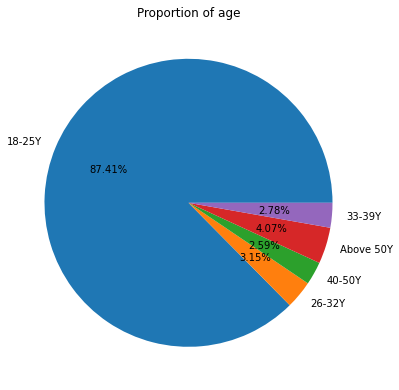

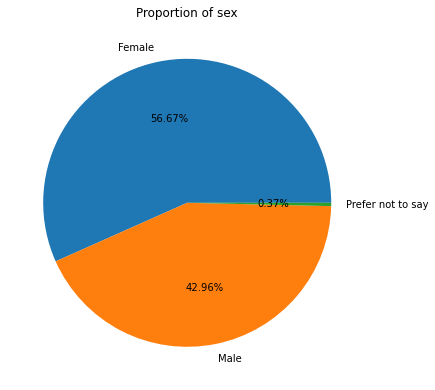

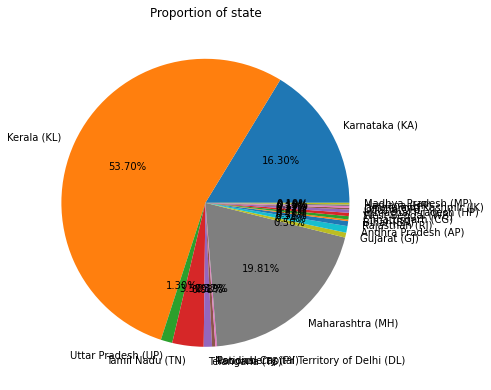

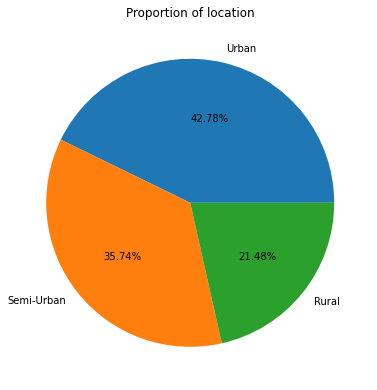

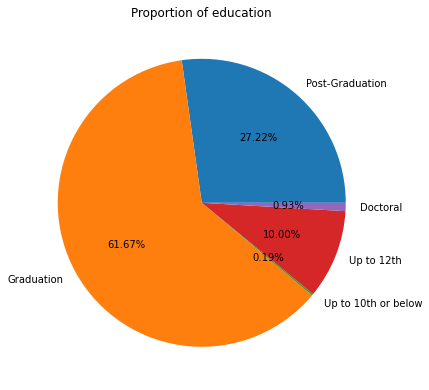

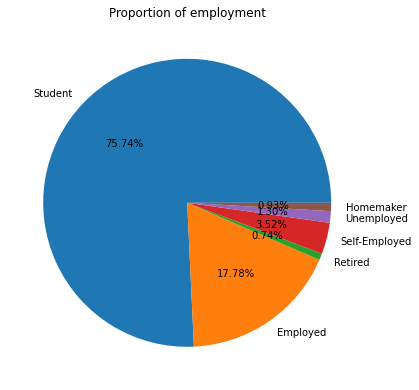

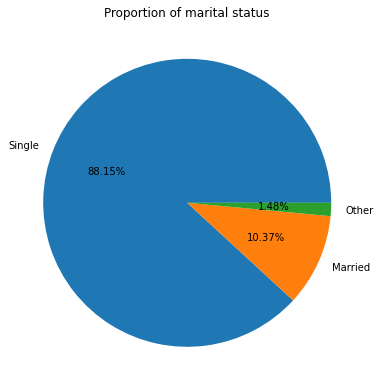

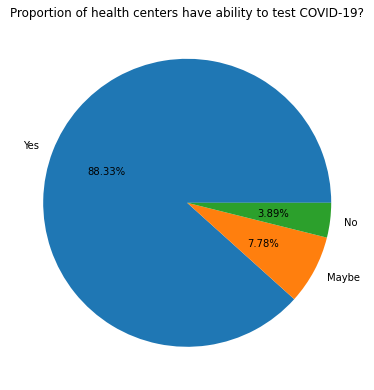

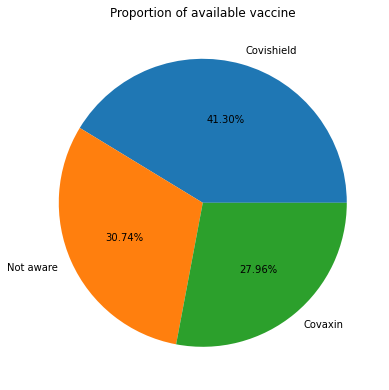

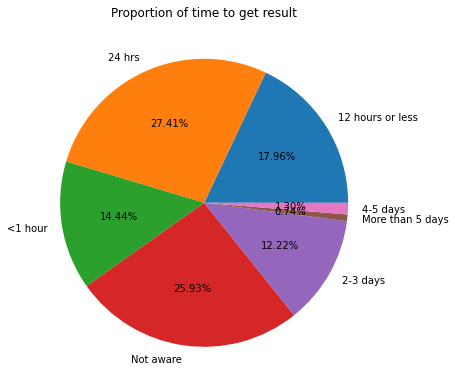

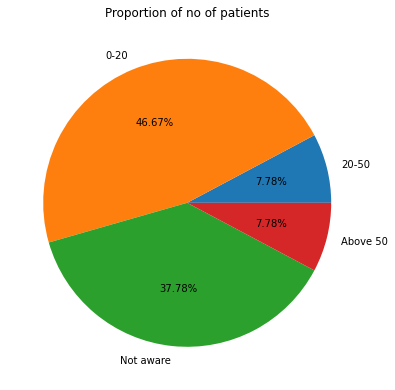

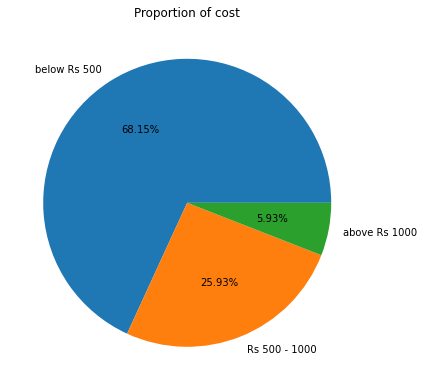

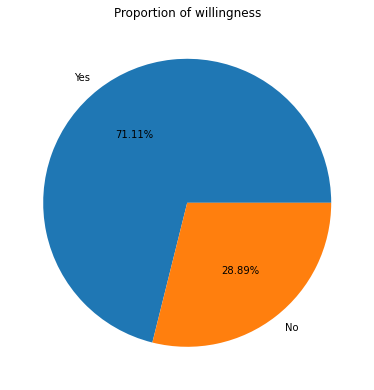

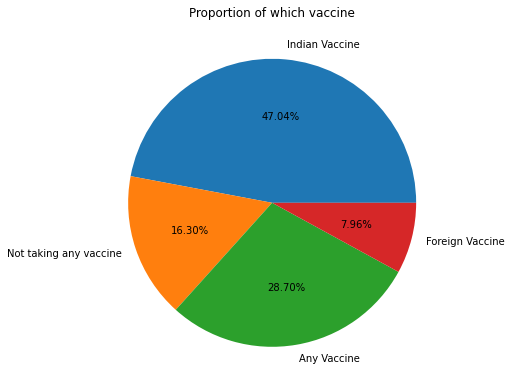

In [8]:
factors=['age','sex','state','location','education','employment','marital status',
         'health centers have ability to test COVID-19?','available vaccine','time to get result',
         'no of patients','cost','willingness','which vaccine']
for col in factors:
    a=list(data[col].unique())
    ss=Counter(data[col])
    ass=list(ss.values())
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = a
    students = ass
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.title("Proportion of "+col)
    plt.show()

## Count Plot for all variables

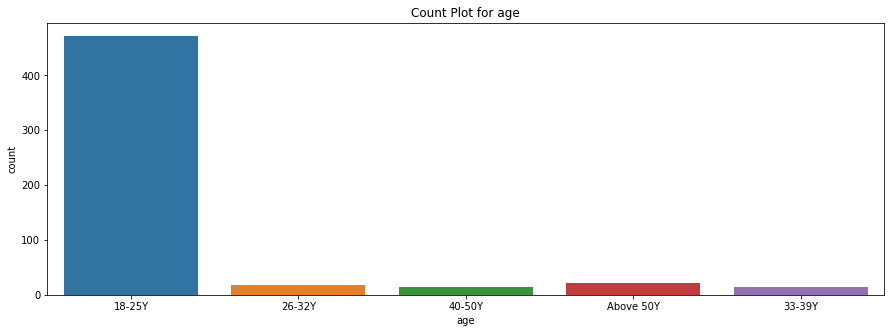

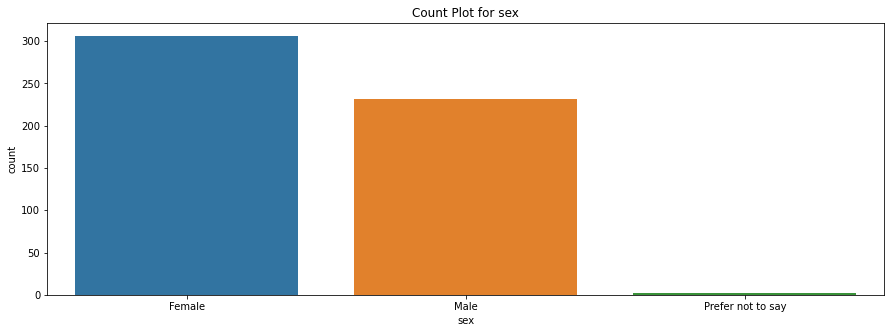

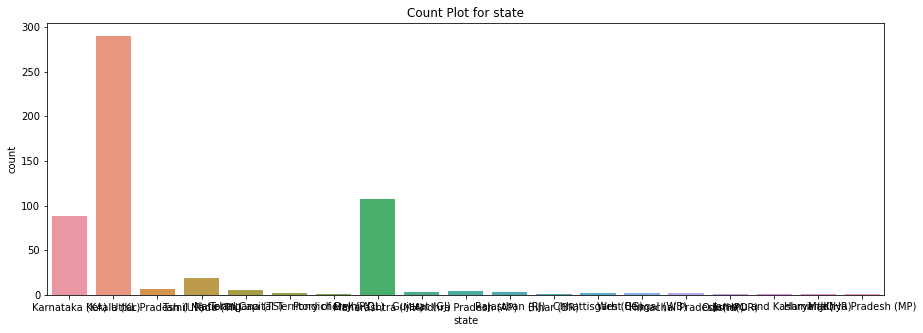

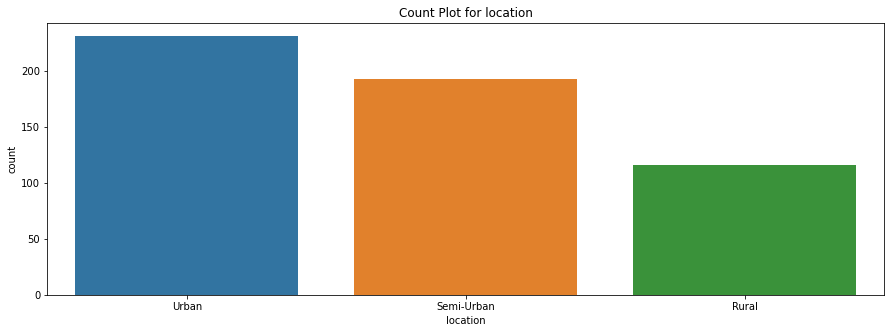

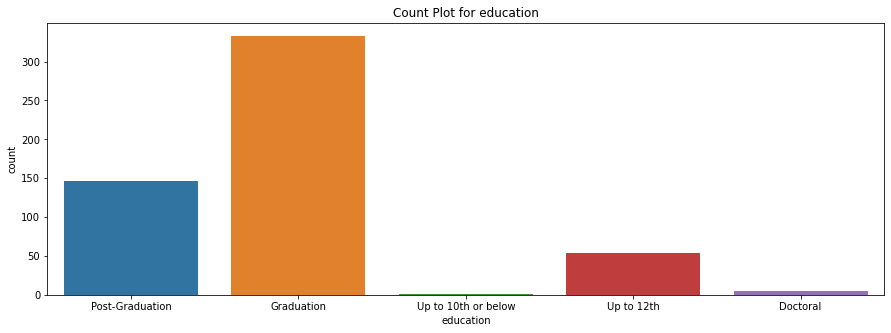

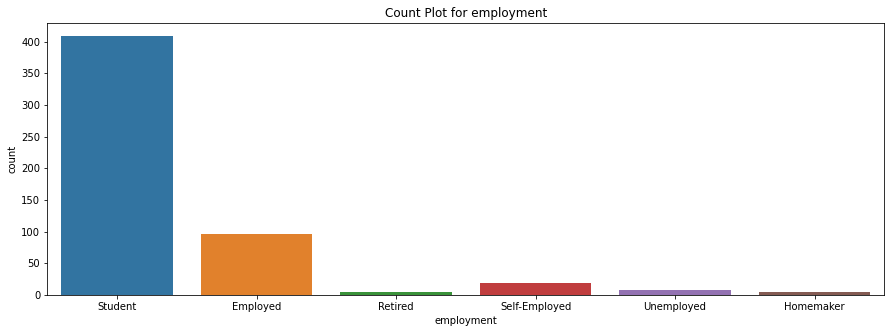

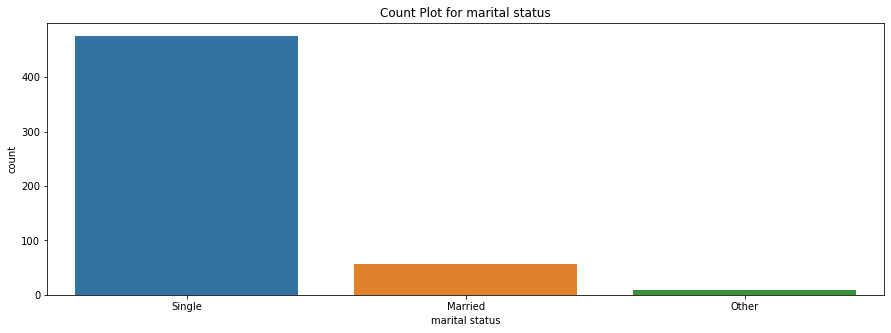

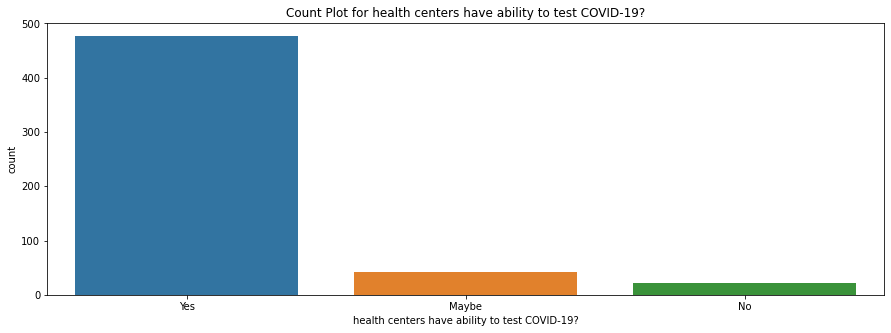

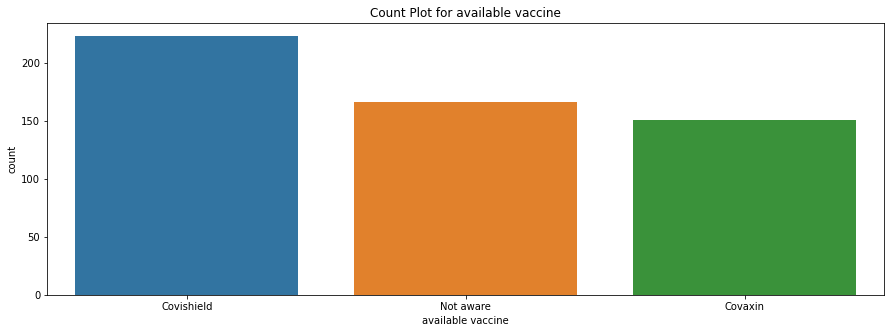

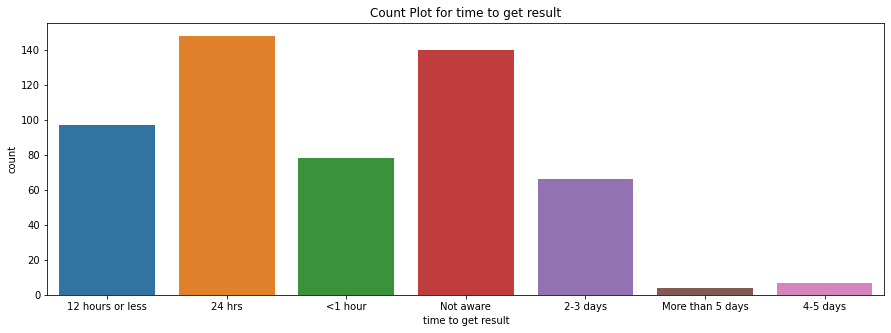

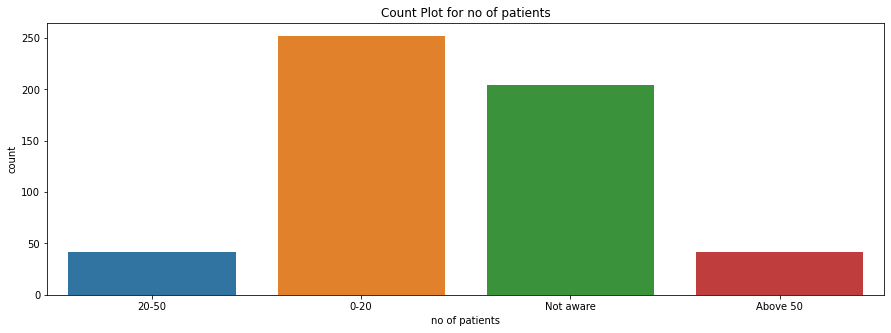

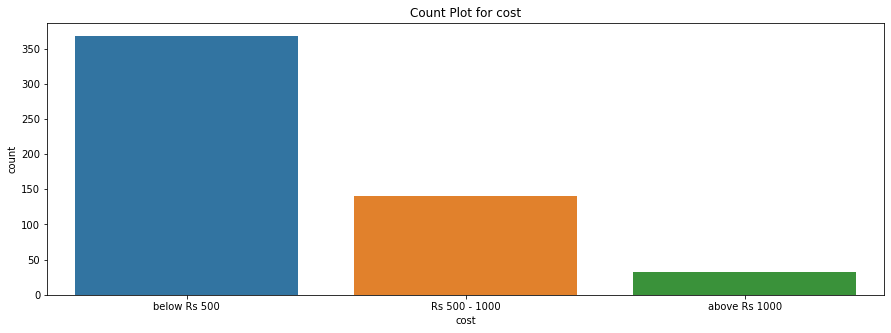

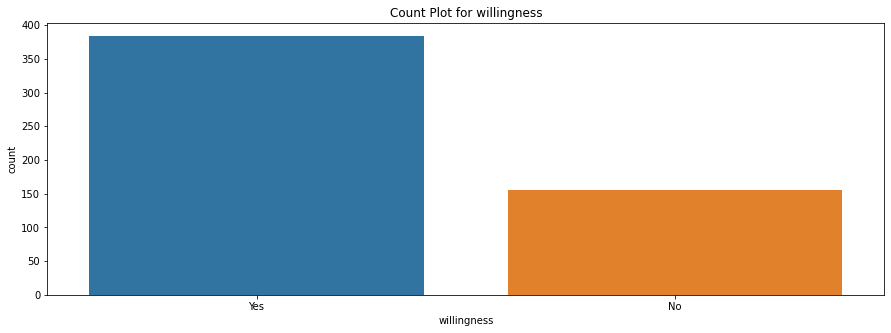

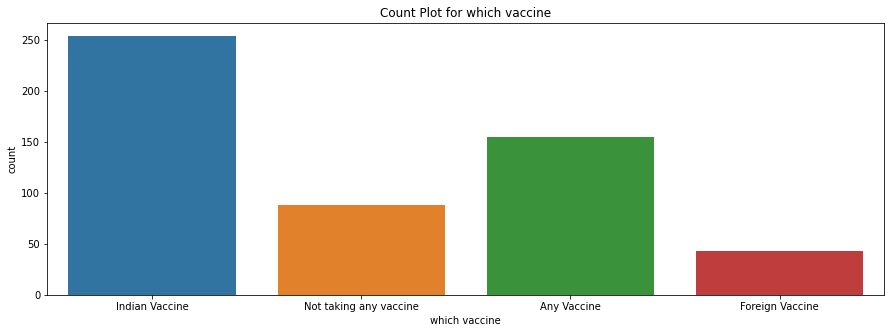

In [9]:
factors=['age','sex','state','location','education','employment','marital status',
         'health centers have ability to test COVID-19?','available vaccine','time to get result',
         'no of patients','cost','willingness','which vaccine']
for col in factors:
    plt.figure(figsize=(15,5))
    sns.countplot(data[col])
    plt.title("Count Plot for "+col)
    plt.show()

## Multiplot for all factors and target variable

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


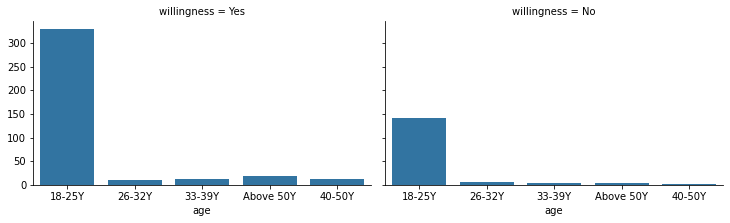

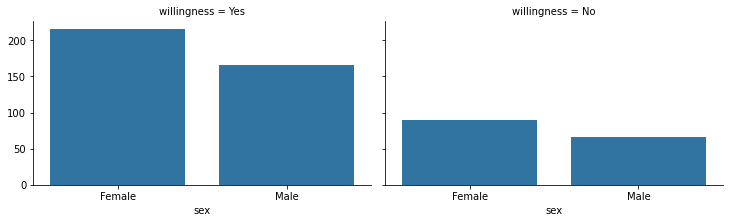

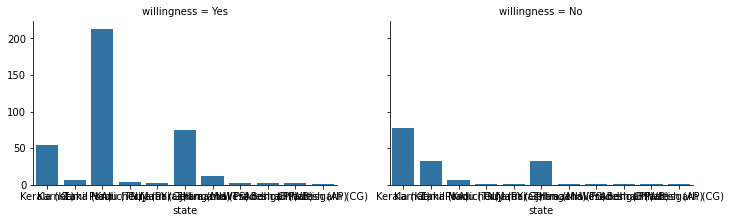

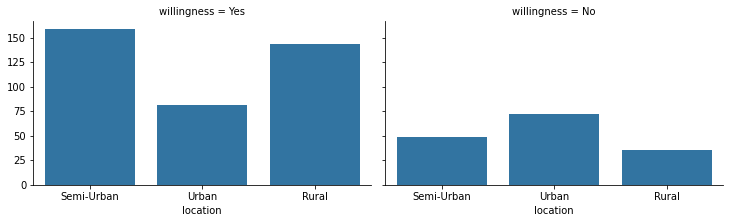

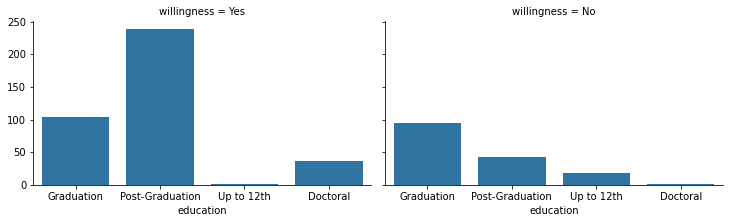

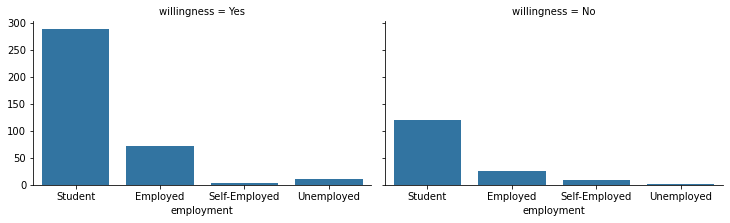

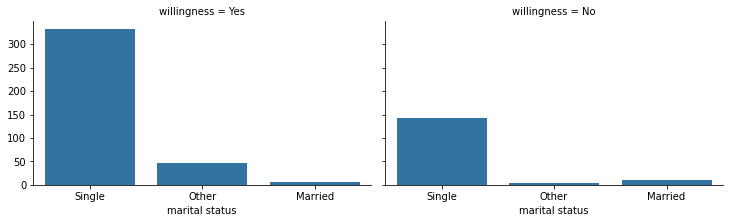

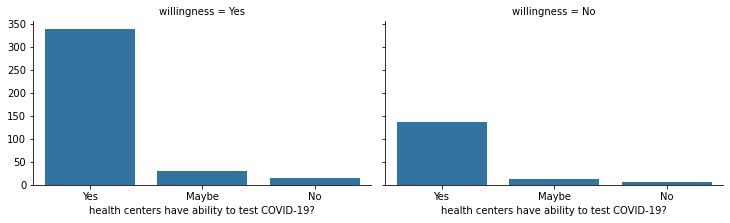

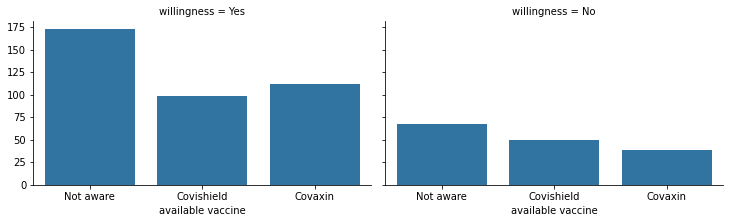

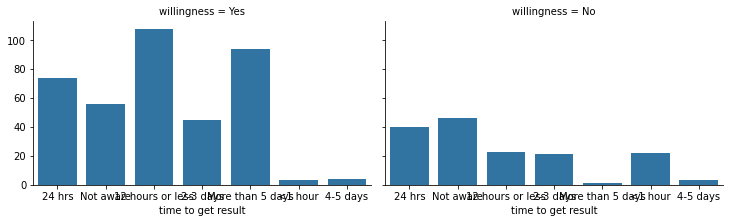

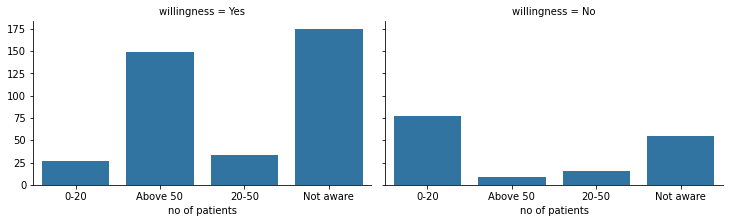

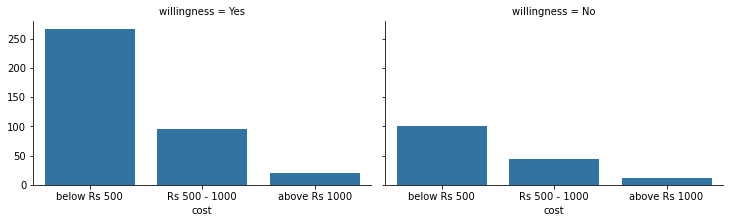

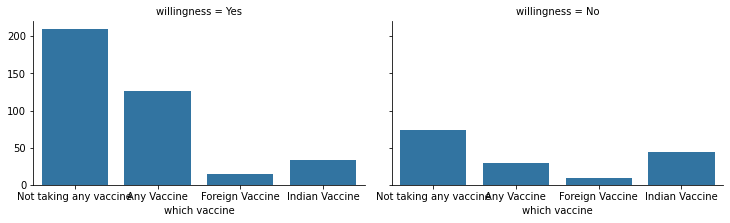

In [10]:
factors=['age','sex','state','location','education','employment','marital status',
         'health centers have ability to test COVID-19?','available vaccine','time to get result',
         'no of patients','cost','which vaccine']
for i in factors:
    grid = sns.FacetGrid(data,col='willingness', size=3.2, aspect=1.6)
    grid.map(sns.countplot,i);

## Countplot of all factors with the target variable as hue

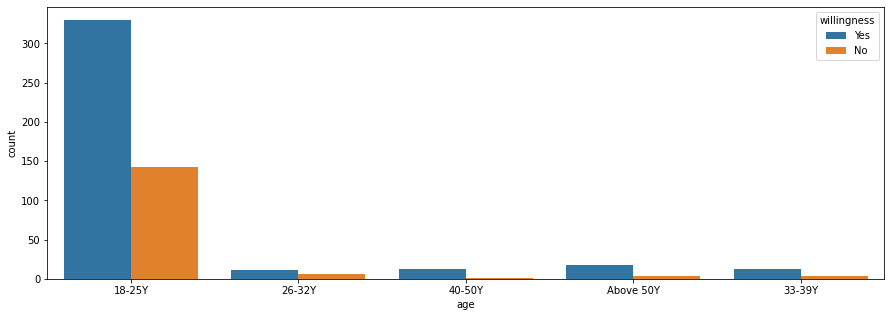

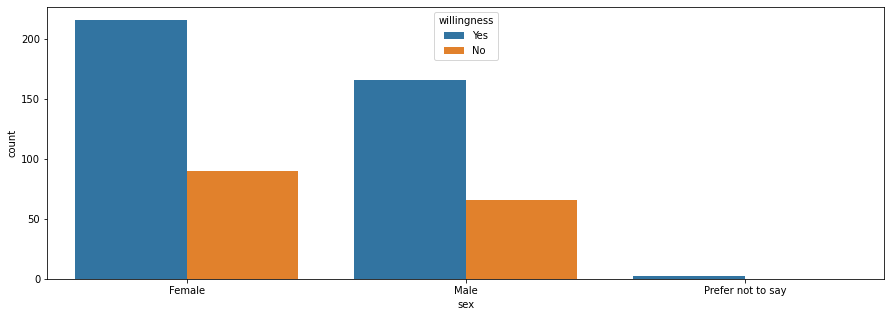

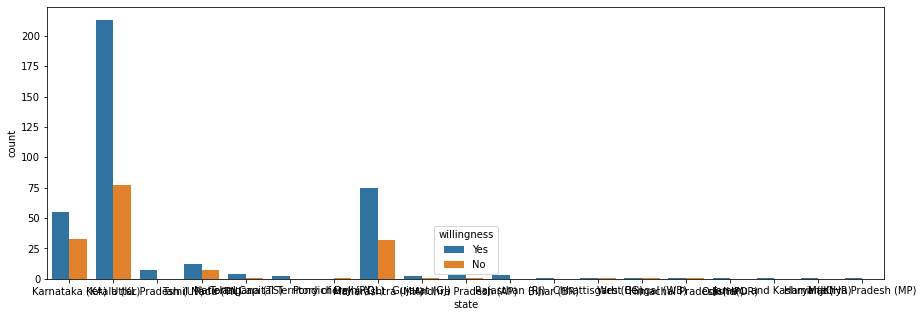

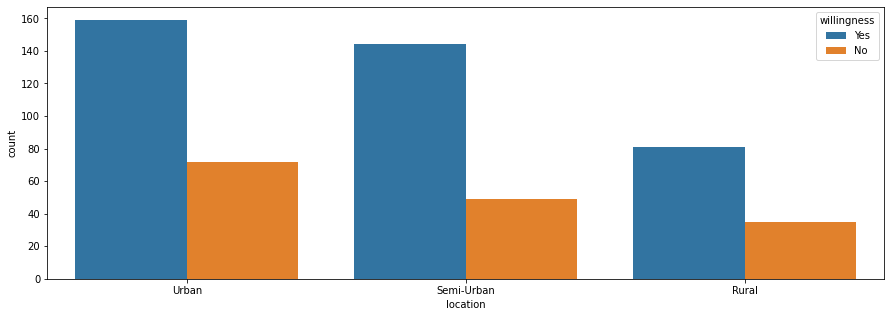

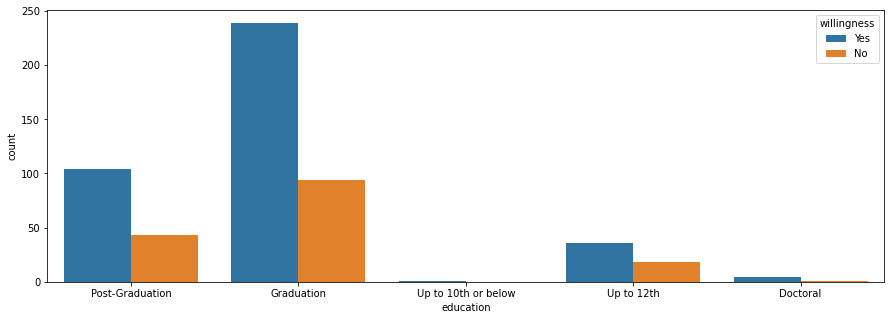

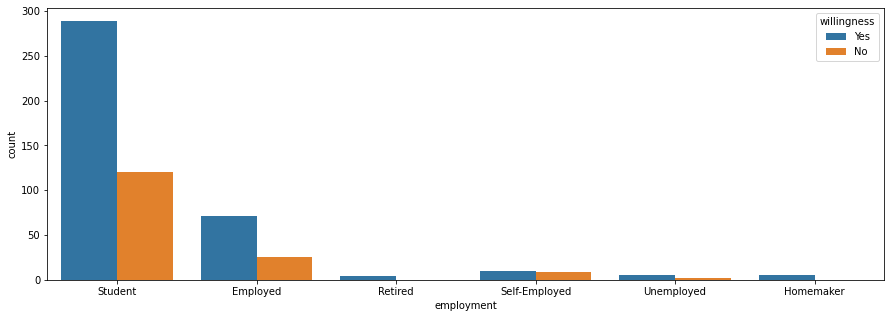

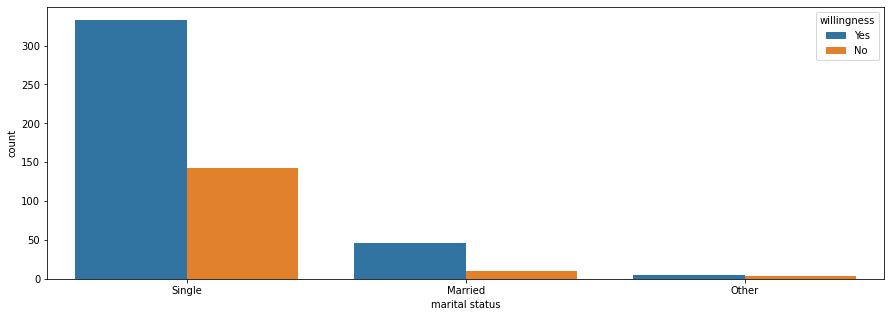

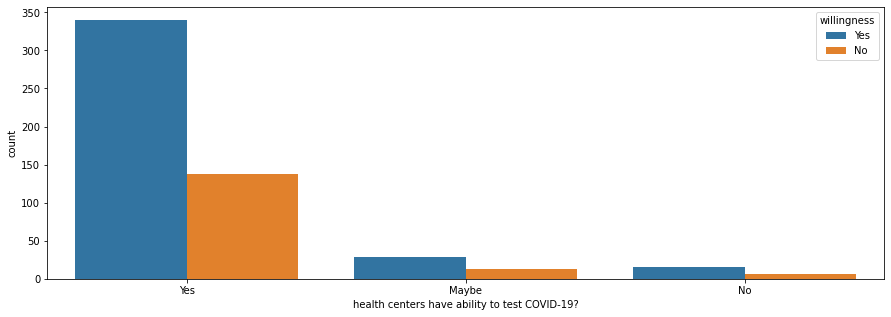

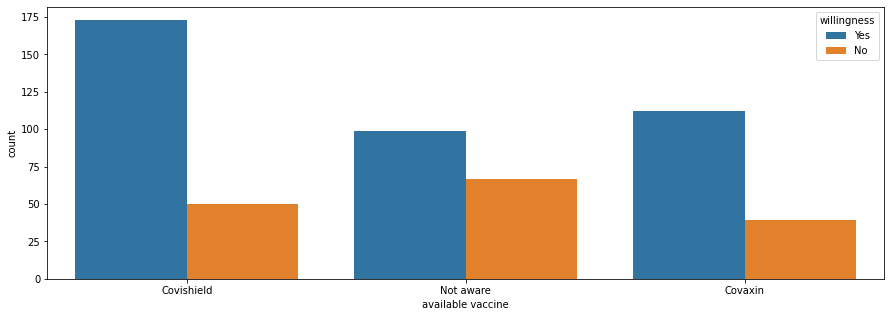

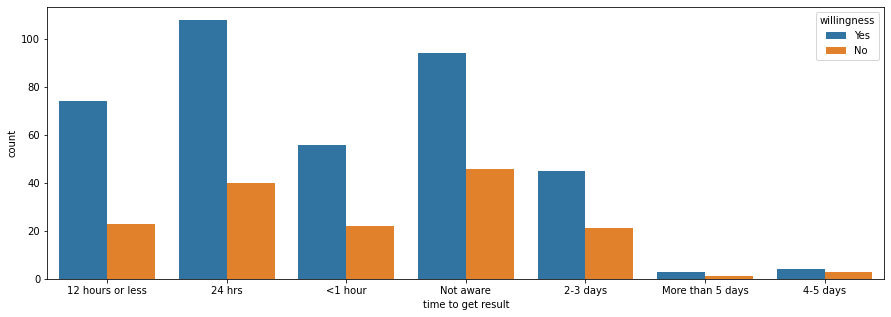

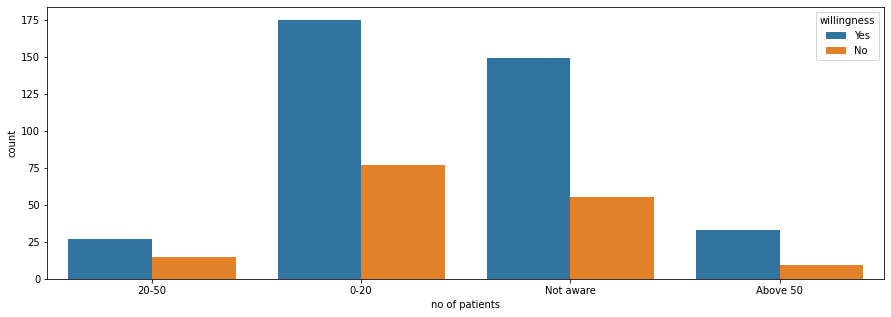

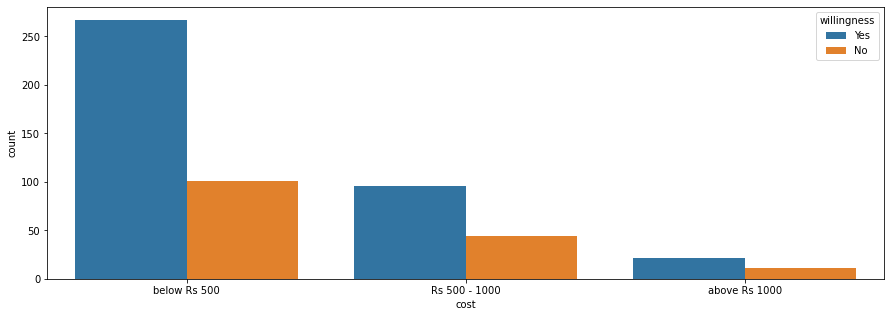

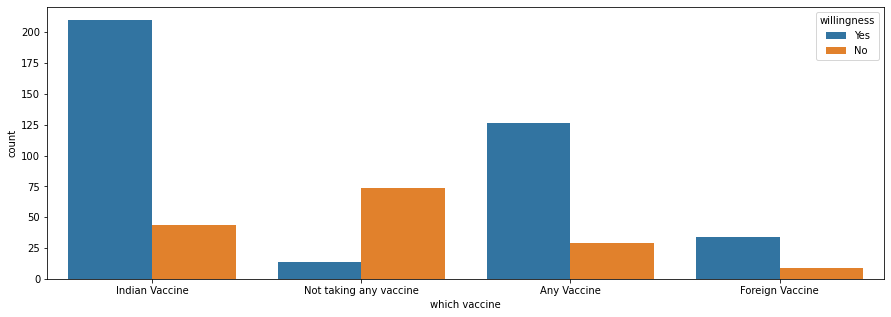

In [11]:
factors=['age','sex','state','location','education','employment','marital status',
         'health centers have ability to test COVID-19?','available vaccine','time to get result',
         'no of patients','cost','which vaccine']
for i in factors:
    plt.figure(figsize=(15,5))
    sns.countplot(x=i, hue='willingness', data=data)

## Dependency check of factors on the target variable

In [12]:
# Chi-square test is used to check if there is significant relation between the categorical vatiables
# Here, the depencency of all the X variables is checked with the target variable
x=data.drop(axis=1,columns=['willingness'])
p_value=[]
for i in x.columns:
    contigency= pd.crosstab(data[i], data['willingness'])
    c, p, dof, expected = chi2_contingency(contigency)
    p_value.append(p)
pd.DataFrame({'Features': x.columns, 'P Value': p_value}).sort_values(by=['P Value'])

,Features,P Value
15,which vaccine,1.200227e-33
8,available vaccine,3.589477e-04
13,factor to get vaccine,1.534731e-02
6,marital status,1.412574e-01
11,concerns,1.449752e-01
5,employment,2.037891e-01
12,challenges,2.194612e-01
0,age,2.230790e-01
3,location,4.007991e-01
10,no of patients,4.234623e-01


###### The variables with P value less than 0.05 have significant relationship with the target variable

# Data Preprocessing
1. Finding number of numerical and categorical variables
2. Encoding the categorical variable
3. Data Balancing
4. Splitting dataset for modeling and testing

## Finding number of numerical and categorical variables

In [13]:
# list of numerical variables
numerical = [feature for feature in data.columns if ((data[feature].dtypes != 'O') & (feature not in ['willingness']))]
print('Number of numerical variables: ', len(numerical))
print(numerical)

Number of numerical variables:  0
[]


In [14]:
# list of numerical variables
categorical = [feature for feature in data.columns if ((data[feature].dtypes == 'O') & (feature not in ['willingness']))]
print('Number of numerical variables: ', len(categorical))
print(categorical)

Number of numerical variables:  16
['age', 'sex', 'state', 'location', 'education', 'employment', 'marital status', 'health centers have ability to test COVID-19?', 'available vaccine', 'time to get result', 'no of patients', 'concerns', 'challenges', 'factor to get vaccine', 'cost', 'which vaccine']


###### There is no numerical columns. All the columns in the dataset is categorical

## Encoding the categorical variables

In [15]:
# Encoding is done using Label Encoder for all the variables
le = preprocessing.LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [16]:
data.head()

,age,sex,state,location,education,employment,marital status,health centers have ability to test COVID-19?,available vaccine,time to get result,no of patients,concerns,challenges,factor to get vaccine,cost,willingness,which vaccine
0,0,0,7,2,2,4,2,2,1,0,1,5,1,14,2,1,2
1,0,0,8,1,1,4,2,2,2,2,0,4,15,2,2,0,3
2,0,1,7,2,2,4,2,2,1,4,3,1,2,14,2,1,2
3,0,0,7,2,2,4,2,0,1,6,0,4,15,16,2,0,3
4,0,0,7,2,2,4,2,2,2,2,2,5,13,26,0,1,2


## Data Balancing

In [17]:
# Checking if the data is balanced or not
data.iloc[:,-2].value_counts()

1    384
0    156
Name: willingness, dtype: int64

###### There is a big difference in the frequency of each class. Therefore data balancing is needed

In [18]:
# Data balencing is done using smote
smote=SMOTE(random_state=42)
x=data.drop(axis=1,columns=['willingness'])
y=data['willingness']
X,Y=smote.fit_resample(x,y)

In [19]:
X_1=pd.DataFrame(X,columns=x.columns)
Y_1=pd.DataFrame(Y,columns=['willingness'])

In [20]:
Y_1['willingness'].value_counts()

1    384
0    384
Name: willingness, dtype: int64

###### Data is balanced using smote

In [21]:
data=pd.merge(X_1,Y_1,left_index=True,right_index=True)
data.head()

,age,sex,state,location,education,employment,marital status,health centers have ability to test COVID-19?,available vaccine,time to get result,no of patients,concerns,challenges,factor to get vaccine,cost,which vaccine,willingness
0,0,0,7,2,2,4,2,2,1,0,1,5,1,14,2,2,1
1,0,0,8,1,1,4,2,2,2,2,0,4,15,2,2,3,0
2,0,1,7,2,2,4,2,2,1,4,3,1,2,14,2,2,1
3,0,0,7,2,2,4,2,0,1,6,0,4,15,16,2,3,0
4,0,0,7,2,2,4,2,2,2,2,2,5,13,26,0,2,1


## Splitting dataset for modeling and testing

In [22]:
# Dataset is splitted into training and testing set in the ratio 7:3.
Y=data.iloc[:,-1]
X=data.iloc[:,0:-1]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size = 0.3,random_state=10)

In [23]:
Ytrain.value_counts()

0    277
1    260
Name: willingness, dtype: int64

# Data Modeling
1. Modeling Using Logistic Regression
2. Model Evaluation of Logistic Regression
3. Modeling Using Naive Bayesian classifier
4. Model Evaluation of Naive Bayesian classifier
5. Modeling Using Support Vector Machine
6. Model Evaluation of Support Vector Machine
7. Modeling Using K Nearest Neighbours Classifier
8. Model Evaluation of K Nearest Neighbours Classifier
9. Modeling Using Random Forest Classiifer
10. Model Evaluation of Random Forest Classiifer

## Modeling using Logistic Regression

In [24]:
lr = LogisticRegression()
lr.fit(Xtrain,Ytrain)
lr_predict = lr.predict(Xtest)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation of Logistic Regression

Right classification : 154
Wrong classification : 77


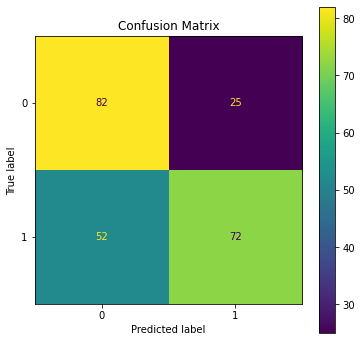

In [25]:
plt.rcParams['figure.figsize'] = (6, 6)
cm=confusion_matrix(Ytest, lr_predict)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]
# Getting right classification and wrong classification
print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
# plotting confusion matrix
plot_confusion_matrix(lr, Xtest, Ytest)
plt.title('Confusion Matrix')
plt.show()

In [26]:
print(classification_report(Ytest, lr_predict))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68       107
           1       0.74      0.58      0.65       124

    accuracy                           0.67       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.68      0.67      0.66       231



###### Logistic regression model provides 67% accuracy

## Modelling Using Naive Bayesian Classifier

In [27]:
gnb=GaussianNB()
gnb.fit(Xtrain,Ytrain)
gnb_predict = gnb.predict(Xtest)

## Model Evaluation of Naive Bayesian Classifier

Right classification : 141
Wrong classification : 90


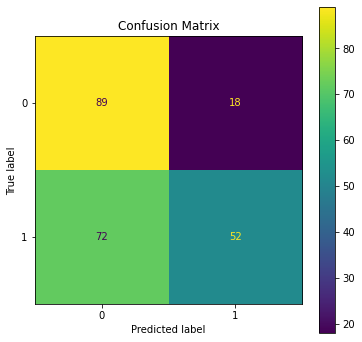

In [28]:
plt.rcParams['figure.figsize'] = (6, 6)
cm=confusion_matrix(Ytest, gnb_predict)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]
# Getting right classification and wrong classification
print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
# plotting confusion matrix
plot_confusion_matrix(gnb, Xtest, Ytest)
plt.title('Confusion Matrix')
plt.show()

In [29]:
print(classification_report(Ytest, gnb_predict))

              precision    recall  f1-score   support

           0       0.55      0.83      0.66       107
           1       0.74      0.42      0.54       124

    accuracy                           0.61       231
   macro avg       0.65      0.63      0.60       231
weighted avg       0.65      0.61      0.60       231



###### Naive Bayesian Classifier Model yeilds 61% accuracy

## Modelling Using Support Vector Classifier

In [30]:
ker=['linear','rbf','sigmoid','poly']
l=[]
# modelling using differnet kernals
for i in ker:
    svc = SVC(kernel=i)
    svc.fit(Xtrain,Ytrain)
    pred_svc=svc.predict(Xtest)
    acc=accuracy_score(Ytest,pred_svc)*100
    l.append(acc)
pd.DataFrame({'Model-Kernel': ker, 'Accuracy': l}).sort_values(
    by='Accuracy',ascending=False)

,Model-Kernel,Accuracy
0,linear,66.233766
1,rbf,63.203463
3,poly,60.606061
2,sigmoid,52.813853


###### Model with linear kernal provides maximum accuracy

In [31]:
# Modelling using linear kernal
svc = SVC(kernel='linear')
svc.fit(Xtrain,Ytrain)
svc_pred =svc.predict(Xtest)

## Model Evaluation of Support Vector Classifier

Right classification : 153
Wrong classification : 78


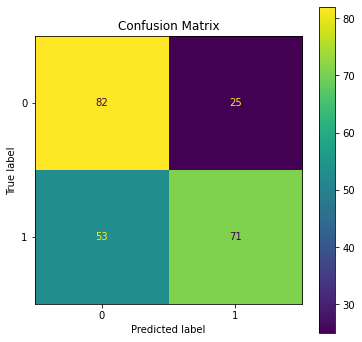

In [32]:
plt.rcParams['figure.figsize'] = (6, 6)
cm=confusion_matrix(Ytest, svc_pred)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]
# Getting right classification and wrong classification
print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
# plotting confusion matrix
plot_confusion_matrix(svc, Xtest, Ytest)
plt.title('Confusion Matrix')
plt.show()

In [33]:
print(classification_report(Ytest, svc_pred))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68       107
           1       0.74      0.57      0.65       124

    accuracy                           0.66       231
   macro avg       0.67      0.67      0.66       231
weighted avg       0.68      0.66      0.66       231



###### Support vector classifier model yeilds 66% accuracy

## Modelling Using K Nearest Neighbour

In [34]:
dist=['euclidean','manhattan','chebyshev','minkowski']
l=[]
n_neighbor=[]
d=[]
# modelling with different kernels and different number of neghbours
for i in dist:
    for j in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=j,metric=i)
        knn.fit(Xtrain,Ytrain)
        pred_knn=knn.predict(Xtest)
        val=accuracy_score(Ytest,pred_knn)*100
        d.append(i)
        n_neighbor.append(j)
        l.append(val)
pd.DataFrame({'Distance':d,'n_neighbors':n_neighbor,'accuracies':l}).sort_values(by=['accuracies'],ascending=False)

,Distance,n_neighbors,accuracies
0,euclidean,1,80.086580
30,minkowski,1,80.086580
10,manhattan,1,79.653680
12,manhattan,3,77.922078
14,manhattan,5,76.190476
13,manhattan,4,72.727273
2,euclidean,3,72.294372
32,minkowski,3,72.294372
16,manhattan,7,71.861472
11,manhattan,2,71.861472


###### Model with 1 nearest neighbour and euclidean distance provides highest accuracy

In [35]:
# Modelling with 1 nearest neighbour and euclidean distance
knn = KNeighborsClassifier(n_neighbors=1,metric="euclidean")
knn.fit(Xtrain,Ytrain)
pred_knn=knn.predict(Xtest)

## Model Evaluation of K Nearest Neighbours

Right classification : 185
Wrong classification : 46


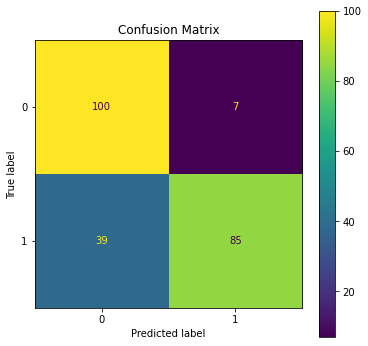

In [36]:
plt.rcParams['figure.figsize'] = (6, 6)
cm=confusion_matrix(Ytest, pred_knn)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]
# Getting right classification and wrong classification
print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
# plotting confusion matrix
plot_confusion_matrix(knn, Xtest, Ytest)
plt.title('Confusion Matrix')
plt.show()

In [37]:
print(classification_report(Ytest, pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       107
           1       0.92      0.69      0.79       124

    accuracy                           0.80       231
   macro avg       0.82      0.81      0.80       231
weighted avg       0.83      0.80      0.80       231



###### K-Nearest Neighbour classifier model yeilds 80% accuracy

## Modelling Using Random Forest Classifier

In [38]:
acc=[]
est=[]
# modelling with different number of trees
for i in range(1,30):
    rfc = RandomForestClassifier(n_estimators=i,random_state=120)
    rfc.fit(Xtrain, Ytrain)
    pred_rfc=rfc.predict(Xtest)
    val=accuracy_score(Ytest,pred_rfc)*100
    est.append(i)
    acc.append(val)

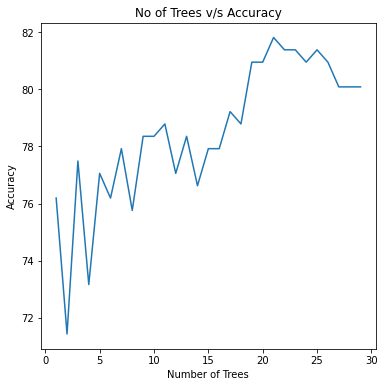

In [39]:
#plotting number of trees against corresponsing accuracy
plt.plot(est,acc)
plt.title("No of Trees v/s Accuracy")
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.show()

In [40]:
conclusion = pd.DataFrame({'Estimators':est,'Accuracies': acc})
conclusion.sort_values(by=['Accuracies'],ascending=False)

,Estimators,Accuracies
20,21,81.818182
21,22,81.385281
24,25,81.385281
22,23,81.385281
25,26,80.952381
23,24,80.952381
18,19,80.952381
19,20,80.952381
28,29,80.086580
27,28,80.086580


###### Model with 21 trees provide maximum accuracy

In [41]:
# Modelling with 21 trees
rfc = RandomForestClassifier(n_estimators=21,random_state=120)
rfc.fit(Xtrain, Ytrain)
pred_rfc = rfc.predict(Xtest)

## Model Evaluation of Random Forest Classifier

Right classification : 189
Wrong classification : 42


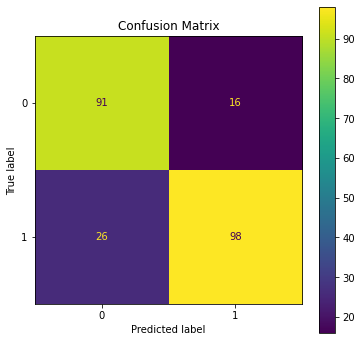

In [42]:
plt.rcParams['figure.figsize'] = (6, 6)
cm=confusion_matrix(Ytest, pred_rfc)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]
# Getting right classification and wrong classification
print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
# plotting confusion matrix
plot_confusion_matrix(rfc, Xtest, Ytest)
plt.title('Confusion Matrix')
plt.show()

In [43]:
print(classification_report(Ytest, pred_rfc))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       107
           1       0.86      0.79      0.82       124

    accuracy                           0.82       231
   macro avg       0.82      0.82      0.82       231
weighted avg       0.82      0.82      0.82       231



###### Random Forest Classifier model yeilds 82% accuracy

# Selecting Best Model
1. Selecting best model with respect to accuracy
2. Selecting best model with respect to ROC Curve

## Selection Based on Accuracy

In [44]:
# Tabulating the models with their corresponding accuracy
conclusion = pd.DataFrame({'Models': ['Logistic Regression','Gaussian NB','SVC','K-Neighbors Classifier',
                                      'Random Forest Classifier'],
                           'Accuracies': [accuracy_score(Ytest,lr_predict)*100,accuracy_score(Ytest,gnb_predict)*100,
                                          accuracy_score(Ytest, svc_pred)*100,accuracy_score(Ytest, pred_knn)*100,
                                          accuracy_score(Ytest, pred_rfc)*100]})
conclusion.sort_values(by=['Accuracies'],ascending=False)

,Models,Accuracies
4,Random Forest Classifier,81.818182
3,K-Neighbors Classifier,80.086580
0,Logistic Regression,66.666667
2,SVC,66.233766
1,Gaussian NB,61.038961


###### Random Forest Classifier model have the maximum accuracy

## Selection Based on ROC Curve

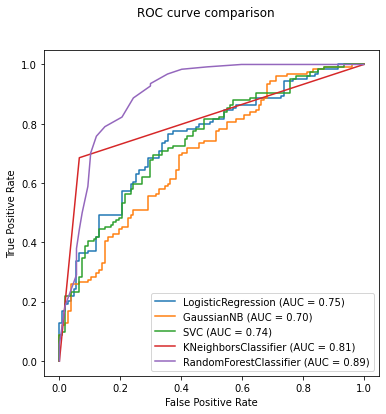

In [45]:
# Plotting the ROC curve of all the models
lr_disp = plot_roc_curve(lr, Xtest, Ytest)
gnb_disp = plot_roc_curve(gnb, Xtest, Ytest, ax=lr_disp.ax_)
svc_disp = plot_roc_curve(svc, Xtest, Ytest, ax=lr_disp.ax_)
knn_disp = plot_roc_curve(knn, Xtest, Ytest, ax=lr_disp.ax_)
rfc_disp = plot_roc_curve(rfc, Xtest, Ytest, ax=lr_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###### ROC curve of Random forest classifier is closer to top left, Hence it is the best model

# Results Based on Best Model
1. ROC Curve
2. Feature Importance
3. Plotting Tree

## ROC Curve of Random Forest Classifier

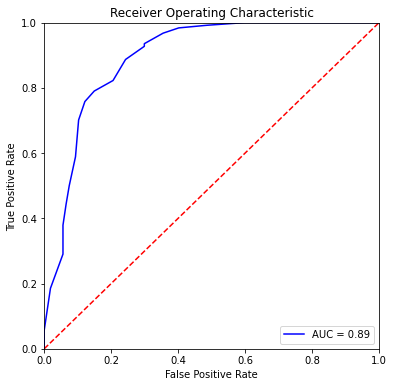

In [46]:
# Plotting ROC curve of random forest classifier
probs = rfc.predict_proba(Xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Ytest, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Feature Importance

In [47]:
# Obtaining the importances of each features in the fitted model
imp=list(np.around(rfc.feature_importances_,4))
feat=list(X.columns)
pd.DataFrame({'Features':feat,'Importances':imp}).sort_values(
    by='Importances',ascending=False)

,Features,Importances
15,which vaccine,0.1965
13,factor to get vaccine,0.1359
12,challenges,0.0992
9,time to get result,0.0789
2,state,0.0686
10,no of patients,0.0615
11,concerns,0.0521
3,location,0.0504
8,available vaccine,0.0466
4,education,0.0395


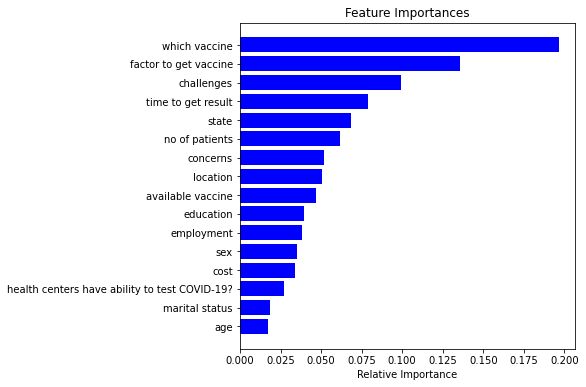

In [48]:
# Plotting bar chart of the importances
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###### The variable 'which vaccine' is of highest importance and 'age' is of lowest importance

## Plotting Tree

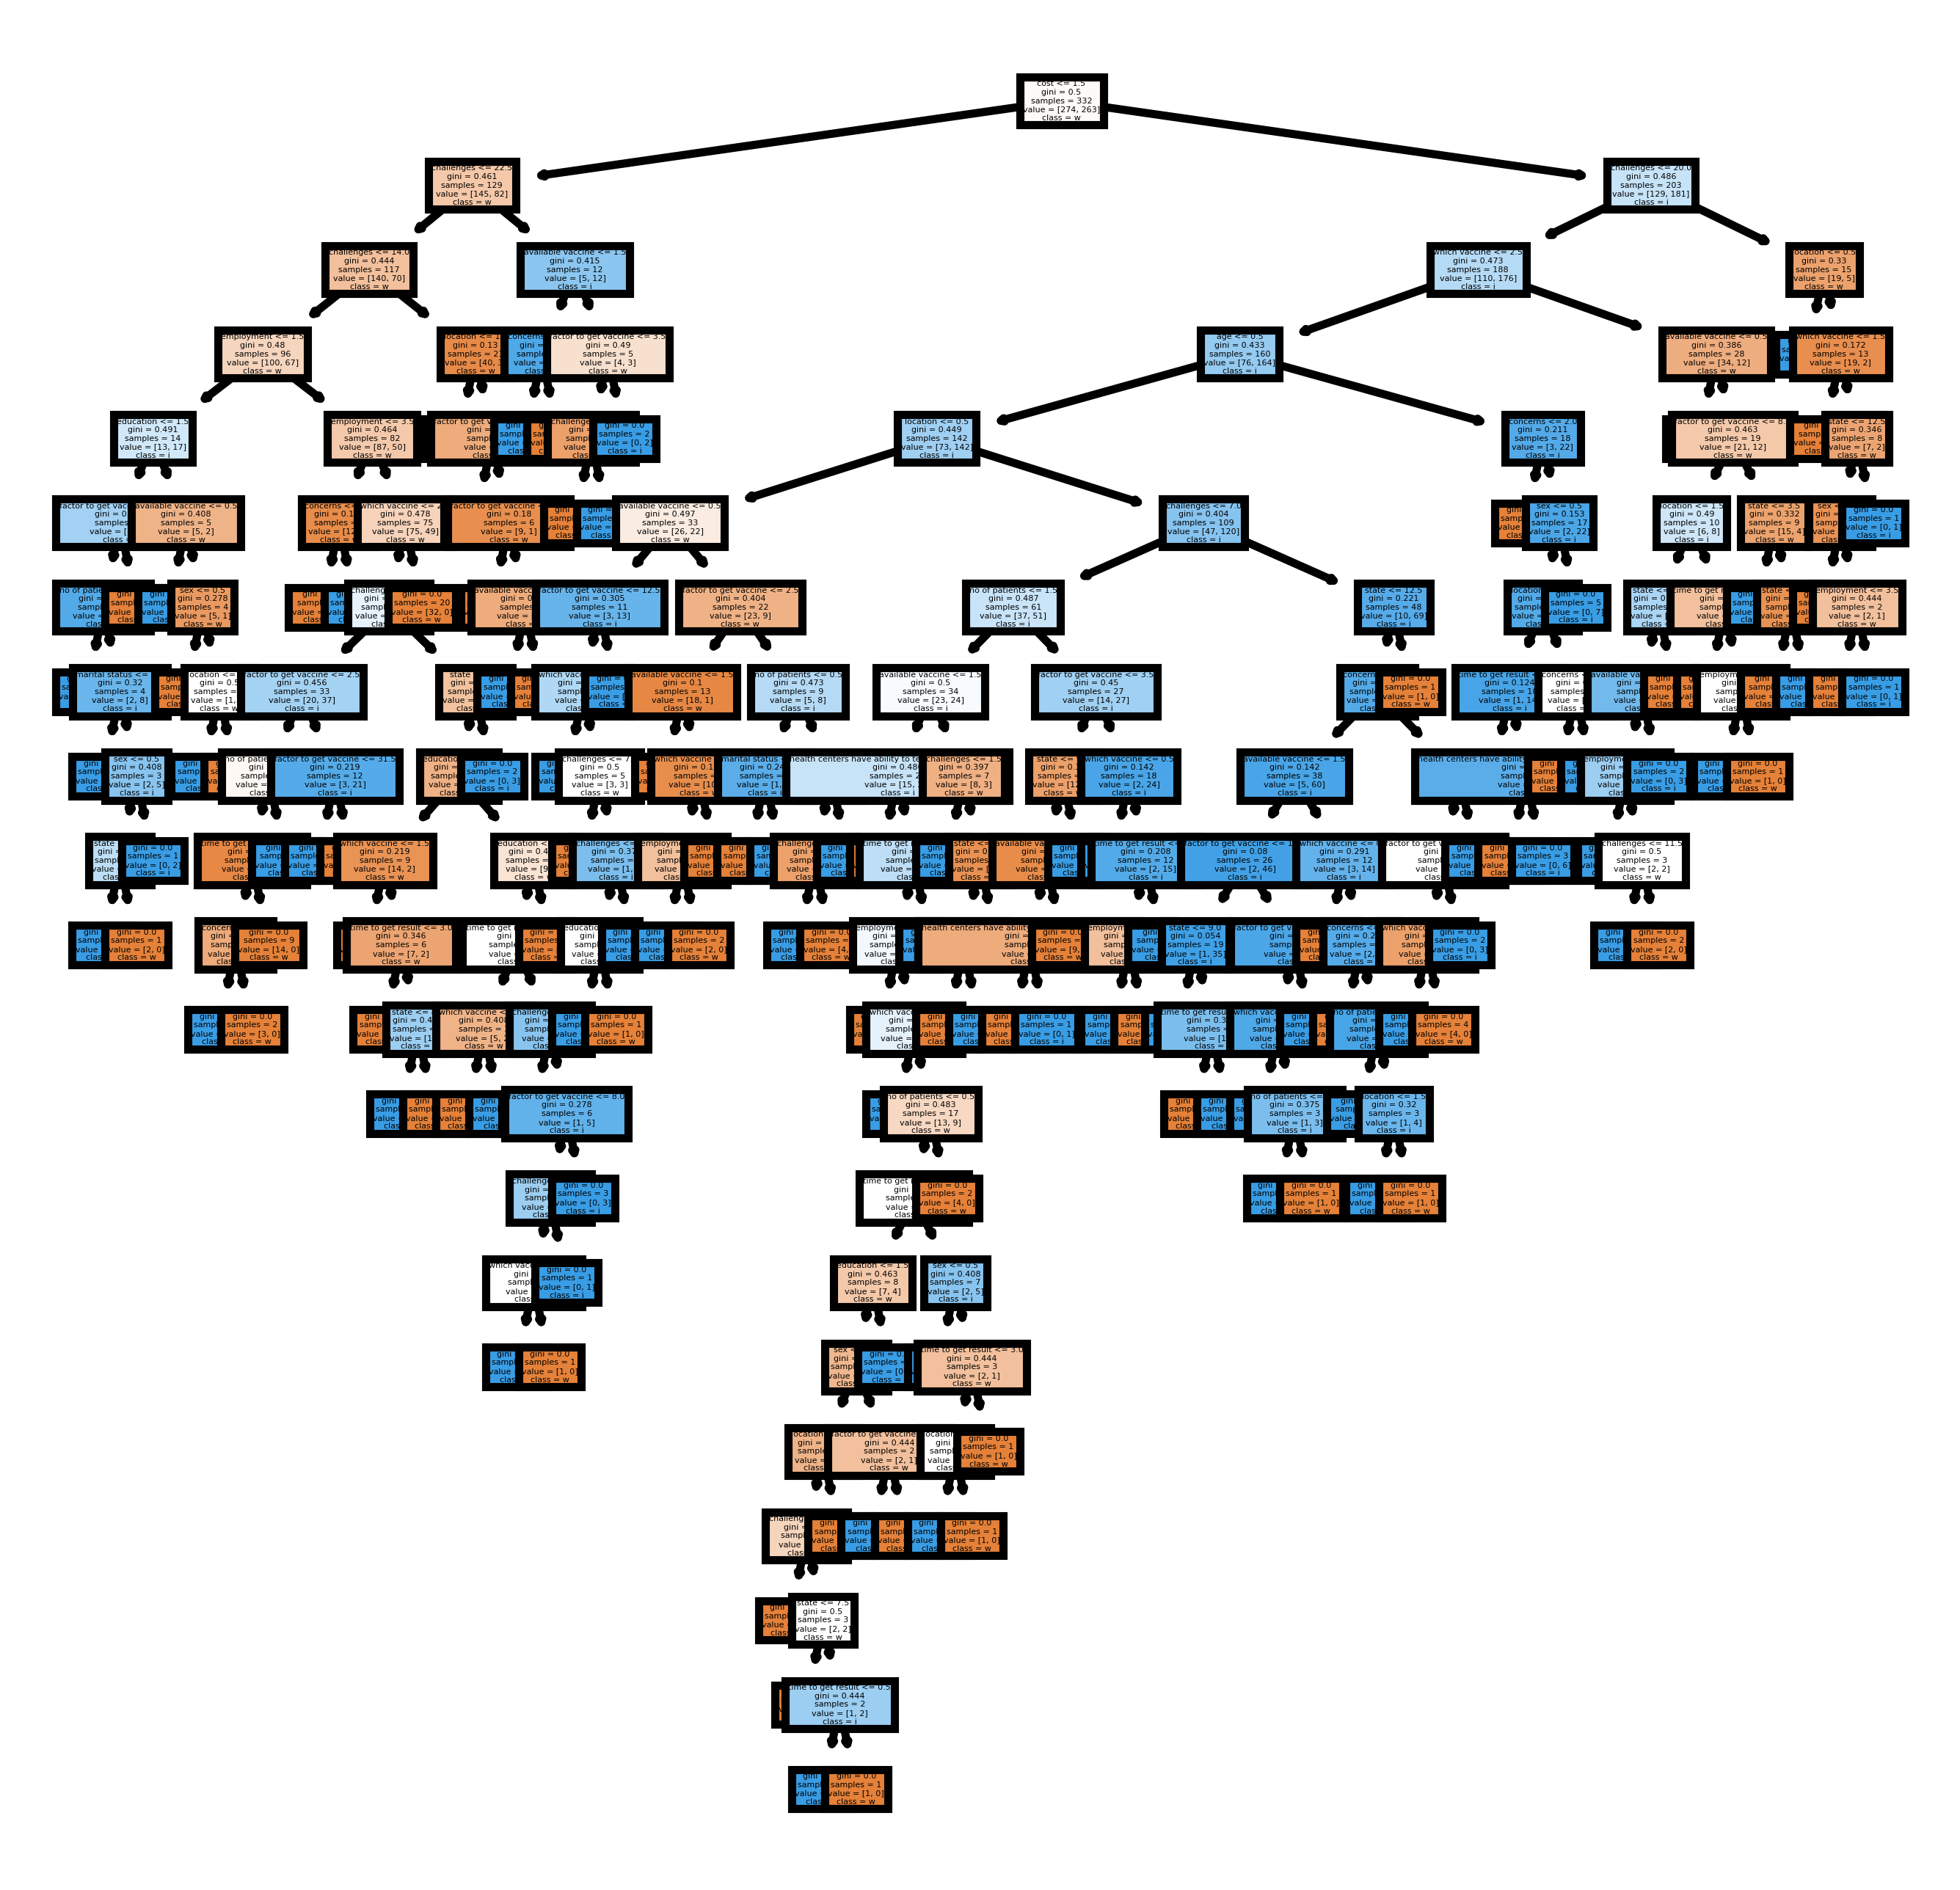

In [49]:
# Plotting Tree of the fitted model
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[5],
               feature_names = X.columns, 
               class_names='willingness',
               filled = True);